In [1]:
import numpy
from scipy import linalg, special
from scipy.integrate import solve_ivp
from matplotlib import pyplot
import matplotlib

#matplotlib.rc("font", **{"family":  "serif", "weight": "normal", "size": 20})

pyplot.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": "28",
    "text.latex.preamble": "\\usepackage[utf8]{inputenc}\\usepackage[T1]{fontenc}\\usepackage{lmodern}"
})

from tqdm.notebook import tqdm

import joblib

from born_markov import *

c:\program files\python37\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\program files\python37\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


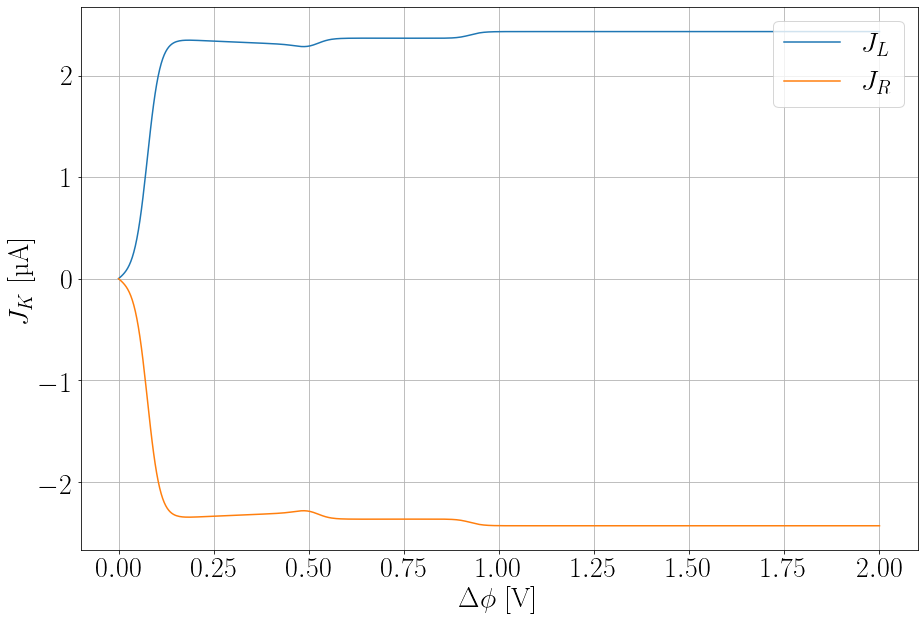

In [2]:
e_1 = .1
e_2 = .2
U = .2
t = .1
Gamma = .01
T = 100 # K
voltages = numpy.linspace(0., 2., 501)

def my_func(i, voltage):
    solver = create_anderson_hopping_solver(e_1, e_2, U, t, Gamma, -0.5*voltage, 0.5*voltage, T, T)
    rho_ss, L = solver.find_steady_state()
    return solver.get_current(rho_ss)

currents = joblib.Parallel(n_jobs=6)(joblib.delayed(my_func)(i, voltage) for i, voltage in enumerate(tqdm(voltages)))
currents = numpy.array(currents)
    
pyplot.figure(figsize=(15,10))
pyplot.plot(voltages, 1e3*currents[:,0], label="$J_L$")
pyplot.plot(voltages, 1e3*currents[:,1], label="$J_R$")

pyplot.grid()
pyplot.legend(loc=1)
pyplot.xlabel("$\\Delta\\phi$ [V]")
pyplot.ylabel("$J_K$ [µA]")
pyplot.show()

In [ ]:
0.5 * (e_1 + e_2 + numpy.array([1., -1.]) * numpy.sqrt((e_1 - e_2)**2 + 4 * t**2))